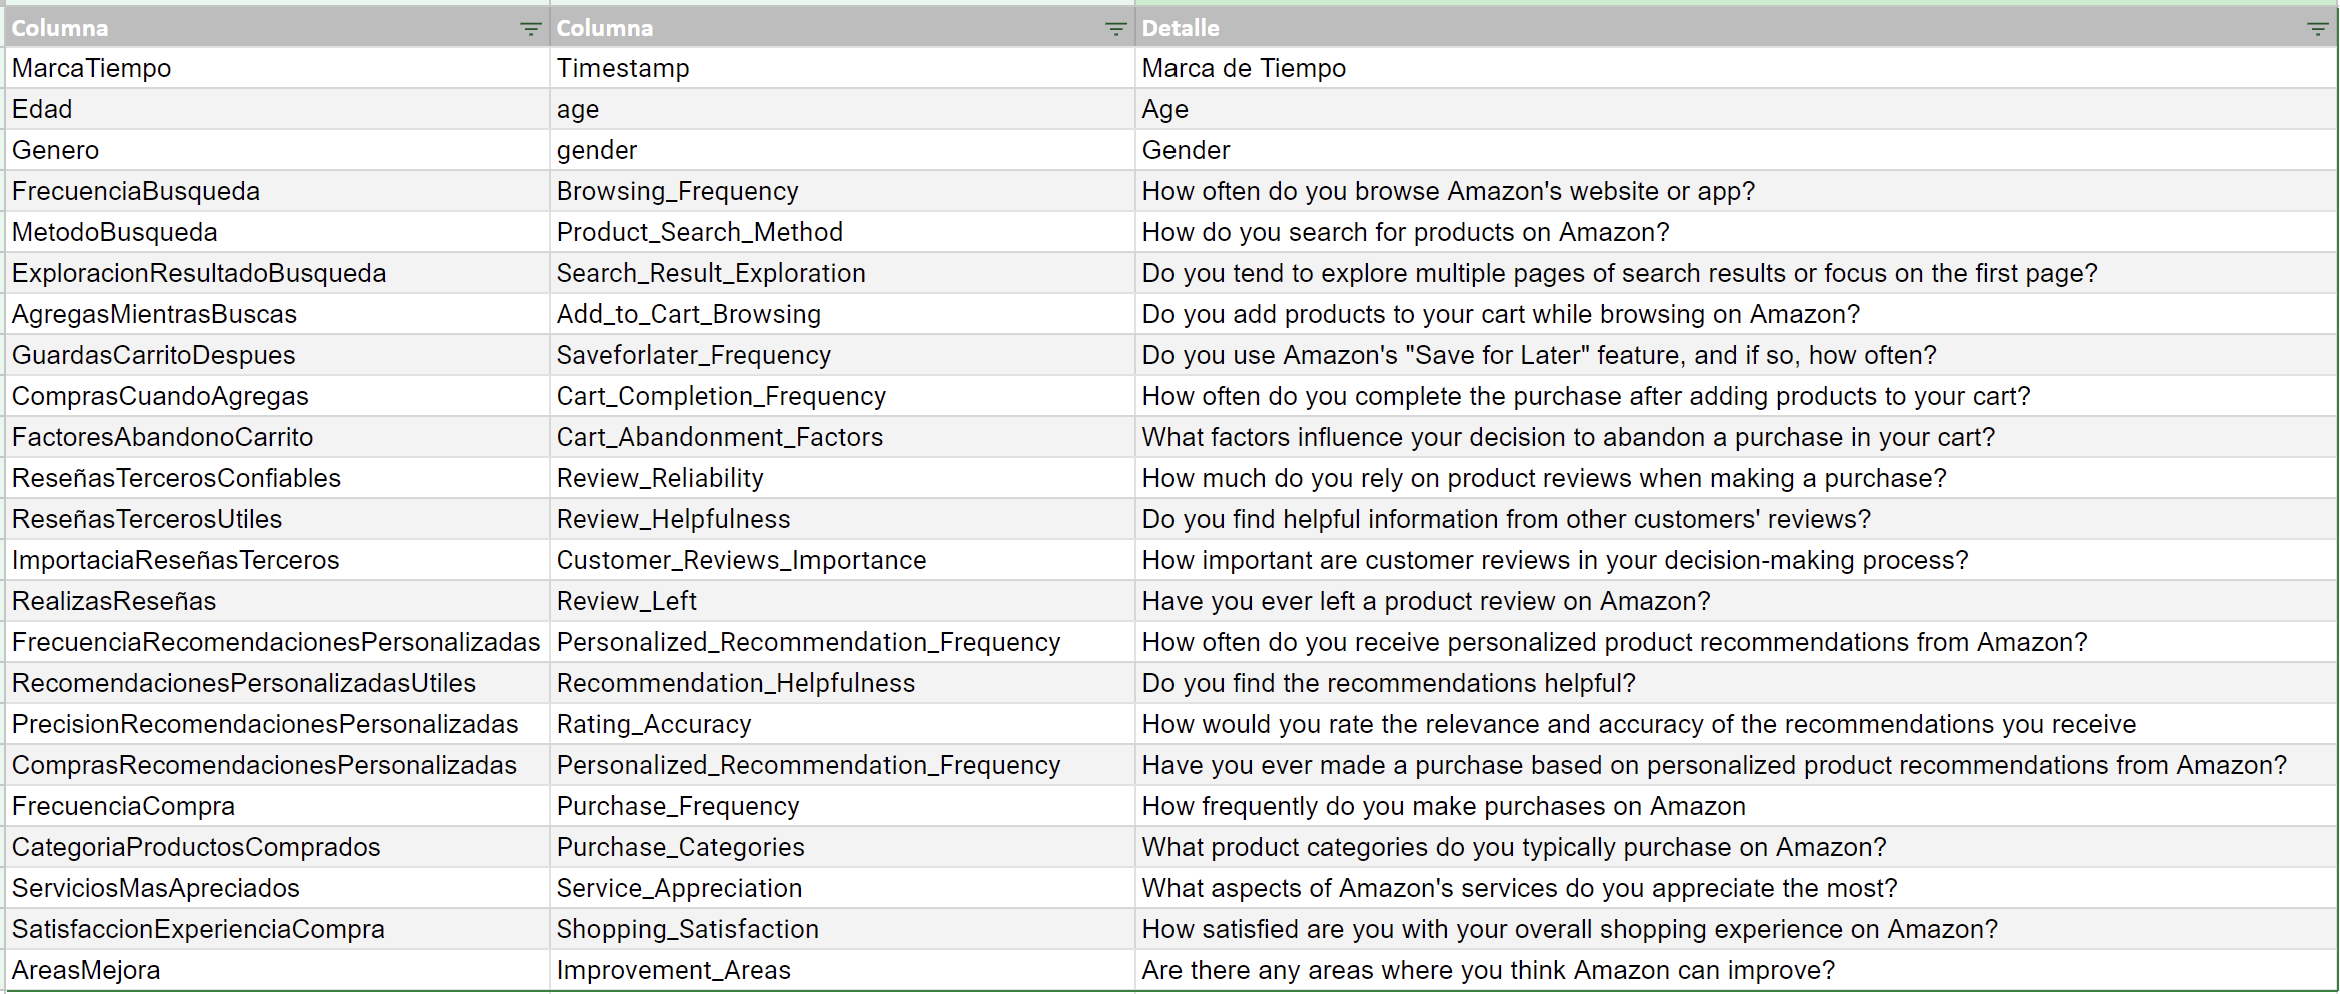

In [ ]:
#from google.colab import drive

#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast

pd.set_option('display.max_columns', None) # show all columns

In [ ]:
df = pd.read_csv('/content/Amazon Customer Behavior SurveyB.csv')

In [ ]:
# cambiar tipo de datos
df.MarcaTiempo = pd.to_datetime(df['MarcaTiempo'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype                                 
---  ------                                   --------------  -----                                 
 0   MarcaTiempo                              602 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   Edad                                     602 non-null    int64                                 
 2   RangoEtario                              602 non-null    object                                
 3   Genero                                   602 non-null    object                                
 4   FrecuenciaBusqueda                       602 non-null    object                                
 5   MetodoBusqueda                           602 non-null    object                                
 6   ExploracionResultadoBusquedas            602 non-null    object                   

In [ ]:
# show data
df.head()

,MarcaTiempo,Edad,RangoEtario,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
0,2023-06-04 13:28:19-05:30,23,20-29 años,Female,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Sometimes,Found a better price elsewhere,Occasionally,Yes,1,Yes,2,Yes,1,Yes,Few times a month,['Beauty and Personal Care'],Competitive prices,1,Reducing packaging waste
1,2023-06-04 14:30:44-05:30,23,20-29 años,Female,Few times a month,Keyword,Multiple pages,Yes,Rarely,Often,High shipping costs,Heavily,Yes,1,No,2,Sometimes,3,Yes,Once a month,['Clothing and Fashion'],Wide product selection,2,Reducing packaging waste
2,2023-06-04 17:04:56-05:30,24,20-29 años,Prefer not to say,Few times a month,Keyword,Multiple pages,Yes,Rarely,Sometimes,Found a better price elsewhere,Occasionally,No,2,No,4,No,3,No,Few times a month,"['Groceries and Gourmet Food', 'Clothing and F...",Competitive prices,3,Product quality and accuracy
3,2023-06-04 17:13:00-05:30,24,20-29 años,Female,Few times a month,Keyword,First page,Maybe,Sometimes,Sometimes,Found a better price elsewhere,Heavily,Yes,5,Yes,3,Sometimes,3,Sometimes,Once a month,"['Beauty and Personal Care', 'Clothing and Fas...",Competitive prices,4,Product quality and accuracy
4,2023-06-04 17:28:06-05:30,22,20-29 años,Female,Few times a month,Filter,Multiple pages,Yes,Rarely,Sometimes,High shipping costs,Heavily,Yes,1,No,4,Yes,2,Yes,Less than once a month,"['Beauty and Personal Care', 'Clothing and Fas...",Competitive prices,2,Product quality and accuracy


---------------------

# EDA

### Valores unicos CategoriaProductosComprados

In [ ]:
# cantidad de categorias unicas presentes en la columna CategoriaProductosComprados
column = df['CategoriaProductosComprados'] # columna a iterar
listA = [] # lista acumulativa inicial

for j in column: # itera columna

  val = ast.literal_eval(j) # toma registro como tipo lista
  for i in val: # itera lista

    if val[val.index(i)] in listA: # elemento en lista acumulativa?
      pass
    else:
      listA.append(val[val.index(i)]) # si no, ingresa nuevo elemento a lista

print(len(listA))

5


In [ ]:
# cantidad de categorias en cada una de las diferentes columnas categóricas
categoricalCol = df.select_dtypes("object").columns

print(f'Columnas categoricas: {len(categoricalCol)} \n')

for column in categoricalCol:

  if column == 'CategoriaProductosComprados':
    print(f'{column}: {len(listA)}')
  else:
    print(f'{column}: {df[column].nunique()}')

Columnas categoricas: 18 

RangoEtario: 5
Genero: 4
FrecuenciaBusqueda: 4
MetodoBusqueda: 5
ExploracionResultadoBusquedas: 2
AgregasMientrasBuscas: 3
GuardasCarritoDespues: 5
ComprasCuandoAgregas: 5
FactoresAbandonoCarrito: 4
ReseñasTercerosConfiables: 5
ReseñasTercerosUtiles: 3
RealizasReseñas: 2
RecomendacionesPersonalizadasUtiles: 3
ComprasRecomendacionesPersonalizadas: 3
FrecuenciaCompra: 5
CategoriaProductosComprados: 5
ServiciosMasApreciados: 9
AreasMejora: 18


In [ ]:
# cuenta cantidad de veces que aparece cada categoria en la lista de categorias de la columna objetivo
dictA = {} # diccionario auxiliar para organizar de mayor a menor

for column in categoricalCol:
  print("-"*25)

  if column == 'CategoriaProductosComprados': # columna objetivo

    for i in range(len(listA)):
      cant = df.CategoriaProductosComprados.apply(lambda x: listA[i] in x).sum() # cantidada categorias
      dictA[cant] = listA[i]

    dictB = sorted(dictA.items(), reverse=True)

    for j in range(len(dictB)):

      print(dictB[j][1], dictB[j][0], sep=' '*(31-len(dictB[j][1]))) # imprime categoria y cantidad

    print('Name: CategoriaProductosComprados, dtype: int64')

  else:
    pass
    print(df[column].value_counts())

  print("-"*25)

-------------------------
20-29 años    313
30-39 años    144
40-49 años     87
>= 50 años     34
< 20 años      24
Name: RangoEtario, dtype: int64
-------------------------
-------------------------
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: Genero, dtype: int64
-------------------------
-------------------------
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: FrecuenciaBusqueda, dtype: int64
-------------------------
-------------------------
categories    223
Keyword       214
Filter        127
others         36
No Data         2
Name: MetodoBusqueda, dtype: int64
-------------------------
-------------------------
Multiple pages    442
First page        160
Name: ExploracionResultadoBusquedas, dtype: int64
-------------------------
-------------------------
Maybe    248
Yes      216
No       138
Name: AgregasMientrasBuscas, dtype: int64
--------------

##### Columnas numericas

In [ ]:
# columnas numericas
numericalCol = df.select_dtypes("number").columns

print(f'Columnas numericas: {len(numericalCol)} \n')

df.describe()

Columnas numericas: 5 



,Edad,ImportanciaReseñasTerceros,FrecuenciaRecomendacionesPersonalizadas,PrecisionRecomendacionesPersonalizadas,SatisfaccionExperienciaCompra
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# valores de cada columna numerica
for column in numericalCol:
  print("-"*25)
  print(df[column].value_counts())
  print("-"*25)

-------------------------
23    123
34     48
24     40
25     36
45     34
21     30
26     27
32     19
22     17
27     17
36     16
35     15
37     14
46     12
40     12
31      9
28      9
29      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
19      4
39      4
17      4
42      4
48      3
60      3
67      2
15      2
57      2
53      2
64      1
58      1
49      1
63      1
52      1
3       1
55      1
62      1
12      1
Name: Edad, dtype: int64
-------------------------
-------------------------
3    216
1    169
2    115
4     64
5     38
Name: ImportanciaReseñasTerceros, dtype: int64
-------------------------
-------------------------
3    240
2    169
1     80
4     78
5     35
Name: FrecuenciaRecomendacionesPersonalizadas, dtype: int64
-------------------------
-------------------------
3    288
2    179
1     58
4     56
5     21
Name: PrecisionRecomendacionesPersonalizadas, dtype

--------------

In [ ]:
sns.set_palette('Paired')

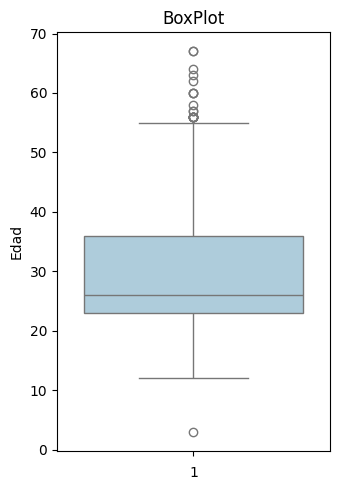

In [ ]:
fig = plt.subplots(1, figsize=(3.5,5))

axes = sns.boxplot(data=df, y='Edad', linewidth=1)
axes.set_title('BoxPlot', fontsize=12)
axes.set_xlabel('1', fontsize=10)
axes.set_ylabel('Edad', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

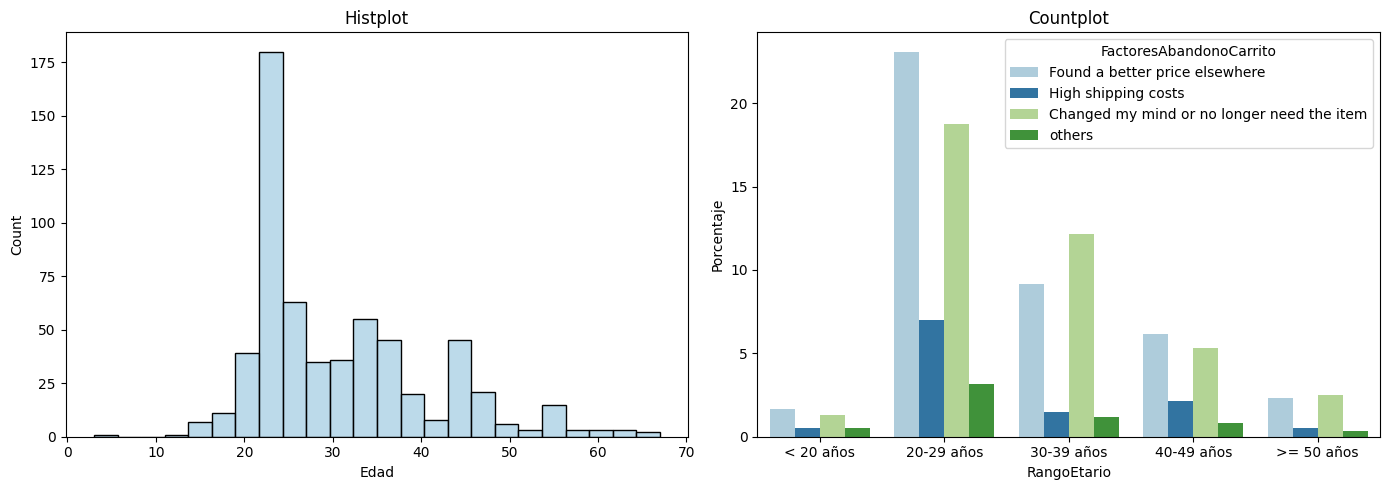

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(data=df, x='Edad', bins=24, ax=axes[0])
axes[0].set_title('Histplot', fontsize=12)
axes[0].set_xlabel('Edad', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.countplot(data=df, x='RangoEtario', order=['< 20 años', '20-29 años', '30-39 años', '40-49 años', '>= 50 años'], stat='percent', hue='FactoresAbandonoCarrito', ax=axes[1])
axes[1].set_title('Countplot', fontsize=12)
axes[1].set_xlabel('RangoEtario', fontsize=10)
axes[1].set_ylabel('Porcentaje', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

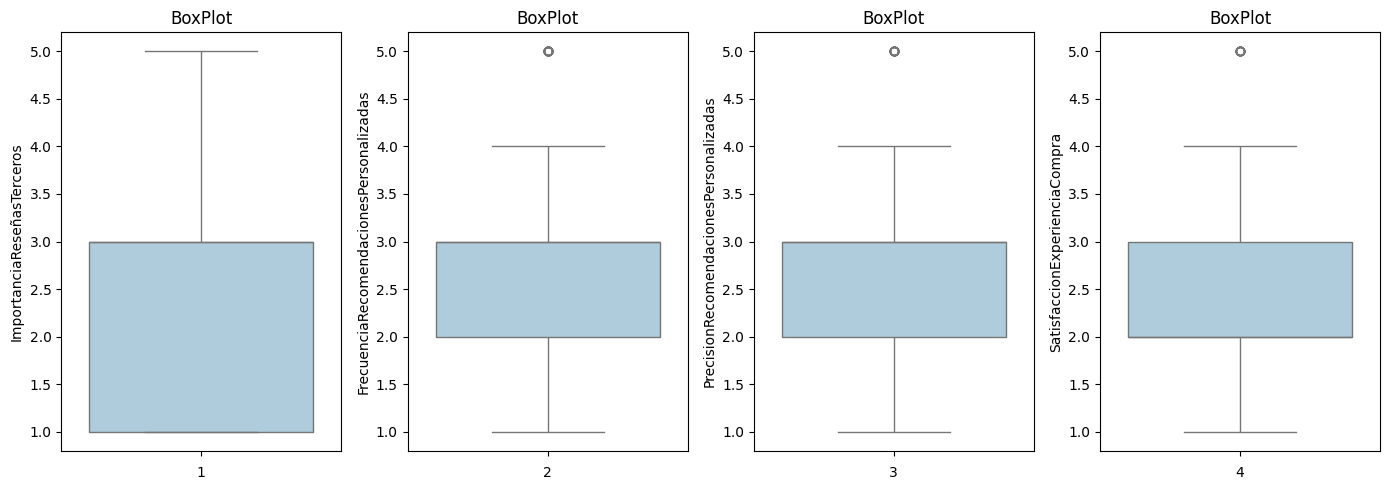

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.boxplot(data=df, y='ImportanciaReseñasTerceros', linewidth=1, ax=axes[0])
axes[0].set_title('BoxPlot', fontsize=12)
axes[0].set_xlabel('1', fontsize=10)
axes[0].set_ylabel('ImportanciaReseñasTerceros', fontsize=10)

sns.boxplot(data=df, y='FrecuenciaRecomendacionesPersonalizadas', linewidth=1, ax=axes[1])
axes[1].set_title('BoxPlot', fontsize=12)
axes[1].set_xlabel('2', fontsize=10)
axes[1].set_ylabel('FrecuenciaRecomendacionesPersonalizadas', fontsize=10)

sns.boxplot(data=df, y='PrecisionRecomendacionesPersonalizadas', linewidth=1, ax=axes[2])
axes[2].set_title('BoxPlot', fontsize=12)
axes[2].set_xlabel('3', fontsize=10)
axes[2].set_ylabel('PrecisionRecomendacionesPersonalizadas', fontsize=10)

sns.boxplot(data=df, y='SatisfaccionExperienciaCompra', linewidth=1, ax=axes[3])
axes[3].set_title('BoxPlot', fontsize=12)
axes[3].set_xlabel('4', fontsize=10)
axes[3].set_ylabel('SatisfaccionExperienciaCompra', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

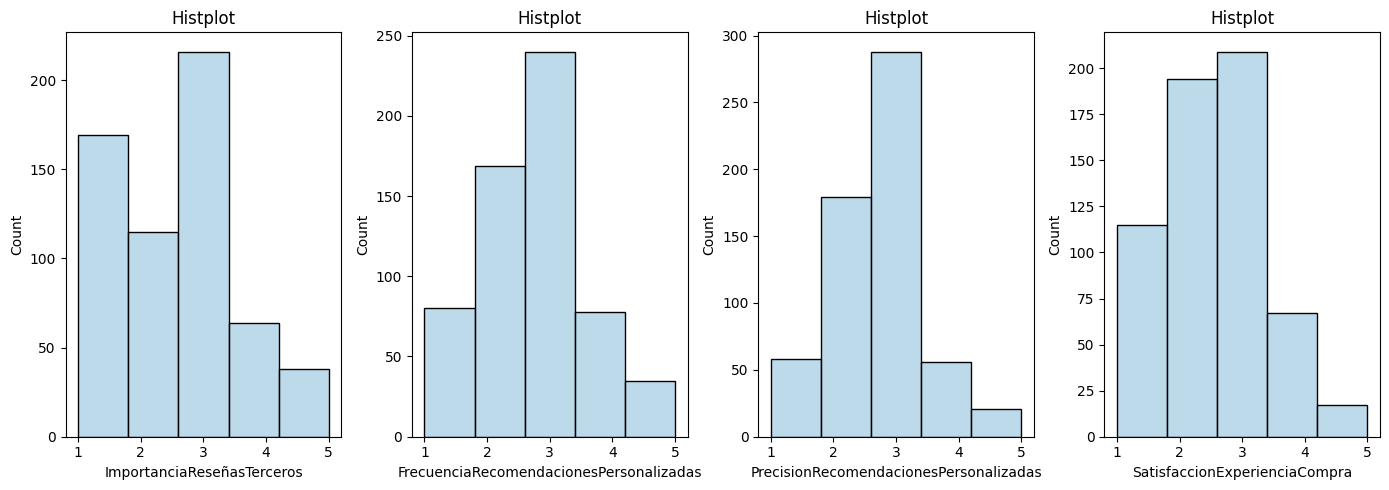

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.histplot(data=df, x='ImportanciaReseñasTerceros', bins=5, ax=axes[0])
axes[0].set_title('Histplot', fontsize=12)
axes[0].set_xlabel('ImportanciaReseñasTerceros', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='FrecuenciaRecomendacionesPersonalizadas', bins=5, ax=axes[1])
axes[1].set_title('Histplot', fontsize=12)
axes[1].set_xlabel('FrecuenciaRecomendacionesPersonalizadas', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='PrecisionRecomendacionesPersonalizadas', bins=5, ax=axes[2])
axes[2].set_title('Histplot', fontsize=12)
axes[2].set_xlabel('PrecisionRecomendacionesPersonalizadas', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='SatisfaccionExperienciaCompra', bins=5, ax=axes[3])
axes[3].set_title('Histplot', fontsize=12)
axes[3].set_xlabel('SatisfaccionExperienciaCompra', fontsize=10)
axes[3].set_ylabel('Count', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

------------

### Edad

In [ ]:
df[df['Edad']<14]

,MarcaTiempo,Edad,RangoEtario,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
442,2023-06-09 10:28:57-05:30,3,< 20 años,Prefer not to say,Few times a week,categories,First page,No,Often,Sometimes,Found a better price elsewhere,Occasionally,Sometimes,3,Yes,3,Sometimes,3,No,Once a month,['Home and Kitchen'],Competitive prices,2,Customer service responsiveness
578,2023-06-12 15:37:14-05:30,12,< 20 años,Female,Few times a week,categories,Multiple pages,Maybe,Always,Sometimes,Found a better price elsewhere,Moderately,Yes,3,Yes,3,Sometimes,4,Yes,Multiple times a week,['Beauty and Personal Care'],Wide product selection,4,Customer service responsiveness


### Comportamiento dia-hora usualmente el usuario interactua con la plataforma

In [ ]:
df['MarcaTiempo'].dt.year.value_counts()

2023    602
Name: MarcaTiempo, dtype: int64

In [ ]:
df['MarcaTiempo'].dt.month_name().value_counts()

June    602
Name: MarcaTiempo, dtype: int64

In [ ]:
df['MarcaTiempo'].dt.day_name().value_counts()

Thursday     119
Wednesday    112
Sunday       100
Monday        98
Tuesday       87
Friday        82
Saturday       4
Name: MarcaTiempo, dtype: int64

In [ ]:
df['MarcaTiempo'].dt.hour.value_counts()

17    76
22    61
23    54
18    49
14    47
19    42
15    42
21    34
9     31
10    31
20    27
16    26
13    20
3     18
12    14
11    13
0      7
8      4
7      3
4      1
2      1
6      1
Name: MarcaTiempo, dtype: int64

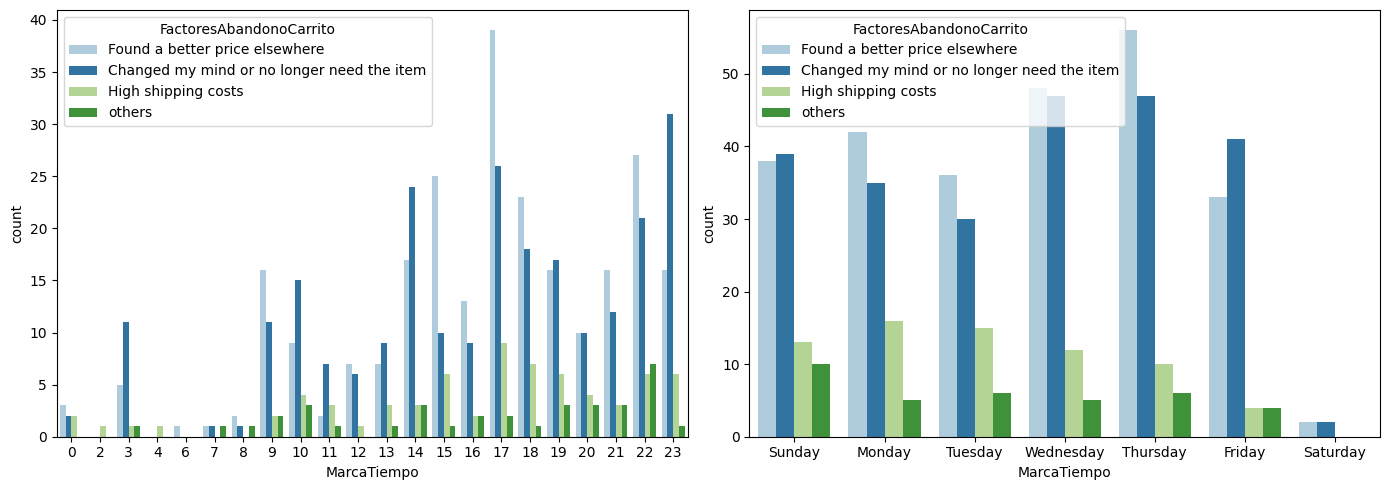

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(data=df, x=df['MarcaTiempo'].dt.hour, hue='FactoresAbandonoCarrito', hue_order=['Found a better price elsewhere', 'Changed my mind or no longer need the item', 'High shipping costs', 'others'], ax=axes[0])

sns.countplot(data=df, x=df['MarcaTiempo'].dt.day_name(), hue='FactoresAbandonoCarrito', hue_order=['Found a better price elsewhere', 'Changed my mind or no longer need the item', 'High shipping costs', 'others'], ax=axes[1])

#ajustar espacio entre subplots
plt.tight_layout()

### Categoria de productos comprados por genero

In [ ]:
df.groupby(['Genero']).size()

Genero
Female               352
Male                 142
Others                19
Prefer not to say     89
dtype: int64

In [ ]:
listB = ['Female', 'Male', 'Prefer not to say', 'Others']

for i in listB:

  dfAux = df[df['Genero']=='%s' % i]
  dictA = {}

  print('-'*25)
  print('%s'%i)

  for j in range(len(listA)):
    cant = dfAux.CategoriaProductosComprados.apply(lambda x: listA[j] in x).sum() # cantidada categorias
    dictA[cant] = listA[j]

  dictB = sorted(dictA.items(), reverse=True)

  for k in range(len(dictB)):

    print(dictB[k][1], dictB[k][0], sep=' '*(31-len(dictB[k][1]))) # imprime categoria y cantidad

-------------------------
Female
Beauty and Personal Care       208
Clothing and Fashion           200
Home and Kitchen               122
others                         76
Groceries and Gourmet Food     57
-------------------------
Male
Clothing and Fashion           79
others                         64
Home and Kitchen               62
Beauty and Personal Care       54
Groceries and Gourmet Food     33
-------------------------
Prefer not to say
Clothing and Fashion           55
Beauty and Personal Care       46
Home and Kitchen               30
others                         20
Groceries and Gourmet Food     14
-------------------------
Others
Beauty and Personal Care       10
Clothing and Fashion           9
Groceries and Gourmet Food     7
Home and Kitchen               6


### Categoria de productos comprados Factores Abandono de carrito

In [ ]:
listB = df['FactoresAbandonoCarrito'].unique()

for i in listB:

  dfAux = df[df['FactoresAbandonoCarrito']=='%s' % i]
  dictA = {}

  print('-'*25)
  print('%s'%i)
  print('-'*25)

  for j in range(len(listA)):
    cant = dfAux.CategoriaProductosComprados.apply(lambda x: listA[j] in x).sum() # cantidada categorias
    dictA[cant] = listA[j]

  dictB = sorted(dictA.items(), reverse=True)

  for k in range(len(dictB)):

    print(dictB[k][1], dictB[k][0], sep=' '*(31-len(dictB[k][1]))) # imprime categoria y cantidad

-------------------------
Found a better price elsewhere
-------------------------
Beauty and Personal Care       145
Clothing and Fashion           139
Home and Kitchen               90
others                         70
Groceries and Gourmet Food     41
-------------------------
High shipping costs
-------------------------
Beauty and Personal Care       41
Clothing and Fashion           40
Home and Kitchen               21
others                         15
Groceries and Gourmet Food     13
-------------------------
Changed my mind or no longer need the item
-------------------------
Clothing and Fashion           143
Beauty and Personal Care       119
Home and Kitchen               95
others                         63
Groceries and Gourmet Food     52
-------------------------
others
-------------------------
Clothing and Fashion           21
others                         18
Home and Kitchen               14
Beauty and Personal Care       13
Groceries and Gourmet Food     5


### FrecuenciaBusqueda

In [ ]:
df.groupby(['FrecuenciaCompra', 'FactoresAbandonoCarrito']).size()

In [ ]:
df.groupby(['FrecuenciaBusqueda', 'FrecuenciaCompra'], sort=False).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

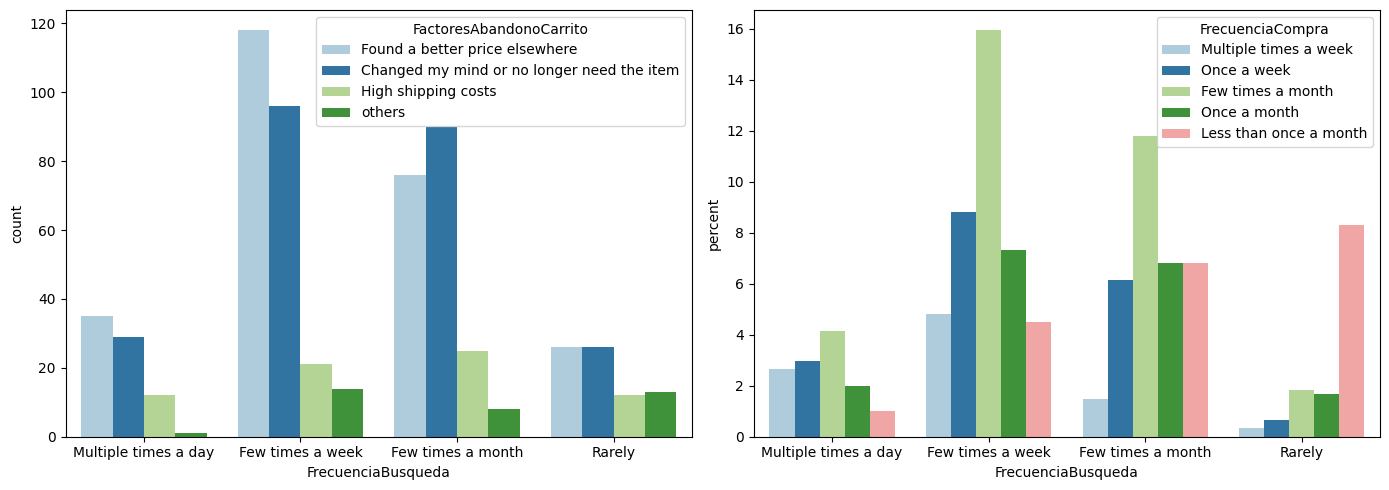

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(data=df, x='FrecuenciaBusqueda', order=['Multiple times a day', 'Few times a week', 'Few times a month', 'Rarely'], hue='FactoresAbandonoCarrito', hue_order=['Found a better price elsewhere', 'Changed my mind or no longer need the item', 'High shipping costs', 'others'], ax=axes[0])

sns.countplot(data=df, x='FrecuenciaBusqueda', order=['Multiple times a day', 'Few times a week', 'Few times a month', 'Rarely'], hue='FrecuenciaCompra', hue_order=['Multiple times a week', 'Once a week', 'Few times a month', 'Once a month', 'Less than once a month'], stat='percent', ax=axes[1])

#ajustar espacio entre subplots
plt.tight_layout()

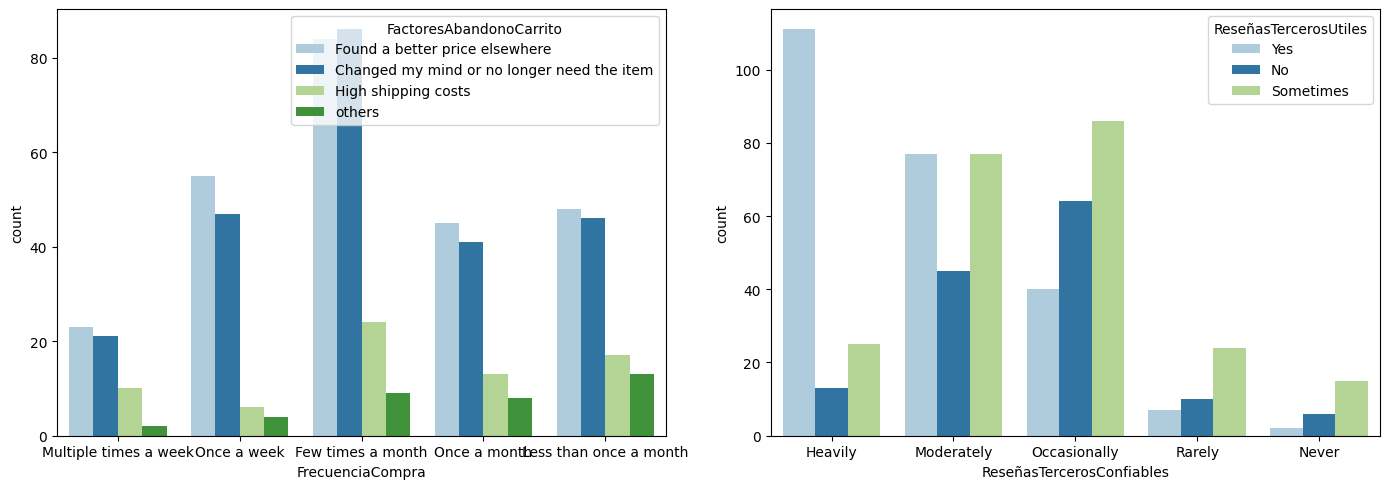

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(data=df, x='FrecuenciaCompra', order=['Multiple times a week', 'Once a week', 'Few times a month', 'Once a month', 'Less than once a month'], hue='FactoresAbandonoCarrito', hue_order=['Found a better price elsewhere', 'Changed my mind or no longer need the item', 'High shipping costs', 'others'], ax=axes[0])

sns.countplot(data=df, x='ReseñasTercerosConfiables', order=['Heavily', 'Moderately', 'Occasionally', 'Rarely', 'Never'], hue='ReseñasTercerosUtiles', ax=axes[1])

#ajustar espacio entre subplots
plt.tight_layout()



In [ ]:
df.groupby(['FactoresAbandonoCarrito', 'AgregasMientrasBuscas']).size()

FactoresAbandonoCarrito                     AgregasMientrasBuscas
Changed my mind or no longer need the item  Maybe                    109
                                            No                        59
                                            Yes                       73
Found a better price elsewhere              Maybe                    100
                                            No                        55
                                            Yes                      100
High shipping costs                         Maybe                     25
                                            No                        12
                                            Yes                       33
others                                      Maybe                     14
                                            No                        12
                                            Yes                       10
dtype: int64

In [ ]:
df[df['ComprasCuandoAgregas']=='Often']['AgregasMientrasBuscas'].value_counts()

Yes      72
Maybe    45
No       41
Name: AgregasMientrasBuscas, dtype: int64

In [ ]:
df[df['ComprasCuandoAgregas']=='Always']['FactoresAbandonoCarrito'].value_counts()

Changed my mind or no longer need the item    17
Found a better price elsewhere                17
High shipping costs                           12
others                                         1
Name: FactoresAbandonoCarrito, dtype: int64

### Factores Abandono carrito ImportanciaReseñasTerceros - PrecisionRecomendacionesPersonalizadas

In [ ]:
df.groupby(['FactoresAbandonoCarrito'])['ImportanciaReseñasTerceros'].mean().reset_index().sort_values(by='ImportanciaReseñasTerceros', ascending=False)

,FactoresAbandonoCarrito,ImportanciaReseñasTerceros
3,others,2.694444
0,Changed my mind or no longer need the item,2.526971
1,Found a better price elsewhere,2.427451
2,High shipping costs,2.400000


In [ ]:
df.groupby(['FactoresAbandonoCarrito'])['PrecisionRecomendacionesPersonalizadas'].mean().reset_index().sort_values(by='PrecisionRecomendacionesPersonalizadas', ascending=False)

,FactoresAbandonoCarrito,PrecisionRecomendacionesPersonalizadas
3,others,3.250000
0,Changed my mind or no longer need the item,2.692946
1,Found a better price elsewhere,2.643137
2,High shipping costs,2.414286


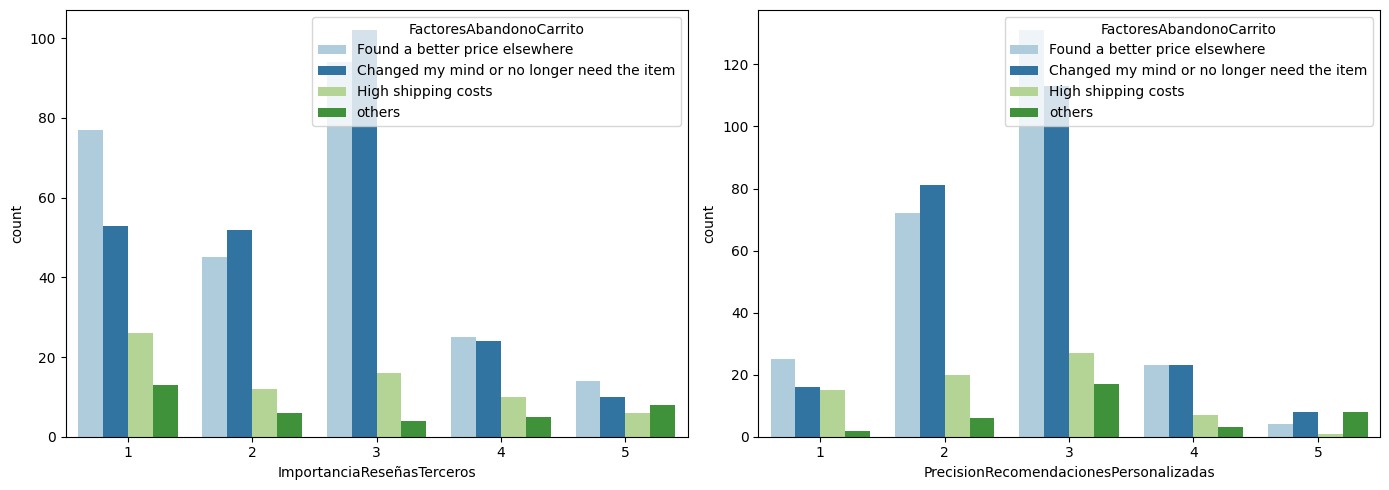

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(data=df, x='ImportanciaReseñasTerceros', hue='FactoresAbandonoCarrito', hue_order=['Found a better price elsewhere', 'Changed my mind or no longer need the item', 'High shipping costs', 'others'], ax=axes[0])

sns.countplot(data=df, x='PrecisionRecomendacionesPersonalizadas', hue='FactoresAbandonoCarrito', hue_order=['Found a better price elsewhere', 'Changed my mind or no longer need the item', 'High shipping costs', 'others'], ax=axes[1])

#ajustar espacio entre subplots
plt.tight_layout()

In [ ]:
#
df[df['Genero']=='Male']['SatisfaccionExperienciaCompra'].mean()

2.3028169014084505

In [ ]:
# promedio Satisfaccion Mujer
df[df['Genero']=='Female']['SatisfaccionExperienciaCompra'].mean()

2.4573863636363638

------------------------------------

In [ ]:
df2 = df.copy()

In [ ]:
# crear nuevas columnas - categorias productos comprados
for i in listA:

  df2['%s' % i] = df2['CategoriaProductosComprados'].apply(lambda x: 1 if i in x else 0)

In [ ]:
df2 = df2[['MarcaTiempo',	'Edad', 'Genero', 'FrecuenciaBusqueda', 'MetodoBusqueda', 'ExploracionResultadoBusquedas', 'AgregasMientrasBuscas', 'GuardasCarritoDespues', 'ComprasCuandoAgregas',  'FactoresAbandonoCarrito', 'ReseñasTercerosConfiables', 'ReseñasTercerosUtiles', 'ImportanciaReseñasTerceros', 'RealizasReseñas', 'FrecuenciaRecomendacionesPersonalizadas', 'RecomendacionesPersonalizadasUtiles', 'PrecisionRecomendacionesPersonalizadas', 'ComprasRecomendacionesPersonalizadas', 'FrecuenciaCompra', 'CategoriaProductosComprados', 'Beauty and Personal Care', 'Clothing and Fashion', 'Groceries and Gourmet Food', 'Home and Kitchen', 'others', 'ServiciosMasApreciados', 'SatisfaccionExperienciaCompra', 'AreasMejora']]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype                                 
---  ------                                   --------------  -----                                 
 0   MarcaTiempo                              602 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   Edad                                     602 non-null    int64                                 
 2   Genero                                   602 non-null    object                                
 3   FrecuenciaBusqueda                       602 non-null    object                                
 4   MetodoBusqueda                           602 non-null    object                                
 5   ExploracionResultadoBusquedas            602 non-null    object                                
 6   AgregasMientrasBuscas                    602 non-null    object                   

In [ ]:
df2.sample(5)

,MarcaTiempo,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,Beauty and Personal Care,Clothing and Fashion,Groceries and Gourmet Food,Home and Kitchen,others,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
589,2023-06-12 15:53:28-05:30,23,Female,Few times a month,Filter,Multiple pages,Maybe,Sometimes,Rarely,Changed my mind or no longer need the item,Occasionally,Sometimes,3,No,3,Sometimes,3,Sometimes,Once a month,['Clothing and Fashion'],0,1,0,0,0,Competitive prices,3,Customer service responsiveness
376,2023-06-08 17:45:59-05:30,36,Female,Few times a week,Filter,Multiple pages,No,Sometimes,Sometimes,Changed my mind or no longer need the item,Moderately,No,2,No,2,Sometimes,2,Yes,Few times a month,"['Beauty and Personal Care', 'Clothing and Fas...",1,1,0,1,0,Wide product selection,1,Reducing packaging waste
166,2023-06-06 19:20:35-05:30,24,Prefer not to say,Few times a month,categories,First page,No,Rarely,Sometimes,Changed my mind or no longer need the item,Occasionally,Sometimes,1,No,3,No,2,Sometimes,Few times a month,"['Beauty and Personal Care', 'Clothing and Fas...",1,1,0,1,0,Wide product selection,3,Product quality and accuracy
321,2023-06-08 10:54:00-05:30,25,Female,Multiple times a day,Filter,Multiple pages,Yes,Always,Always,High shipping costs,Heavily,Yes,1,Yes,1,Yes,1,No,Multiple times a week,"['Beauty and Personal Care', 'Clothing and Fas...",1,1,0,1,0,Quick delivery,3,Reducing packaging waste
37,2023-06-04 23:38:30-05:30,23,Female,Rarely,categories,Multiple pages,Maybe,Rarely,Often,Found a better price elsewhere,Moderately,Yes,1,No,2,Sometimes,2,Sometimes,Less than once a month,"['Beauty and Personal Care', 'Home and Kitchen']",1,0,0,1,0,Wide product selection,2,Reducing packaging waste


In [ ]:
# eliminar atributos
df2.drop(['MarcaTiempo', 'CategoriaProductosComprados'], axis=1, inplace=True)

In [ ]:
categoricalColB = df2.select_dtypes("object").columns

In [ ]:
# codificar variables tipo object a valor numerico
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for i in range(len(categoricalColB)):
  df2[categoricalColB[i]] = le.fit_transform(df2[categoricalColB[i]])

#le.classes_ # clases

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Edad                                     602 non-null    int64
 1   Genero                                   602 non-null    int64
 2   FrecuenciaBusqueda                       602 non-null    int64
 3   MetodoBusqueda                           602 non-null    int64
 4   ExploracionResultadoBusquedas            602 non-null    int64
 5   AgregasMientrasBuscas                    602 non-null    int64
 6   GuardasCarritoDespues                    602 non-null    int64
 7   ComprasCuandoAgregas                     602 non-null    int64
 8   FactoresAbandonoCarrito                  602 non-null    int64
 9   ReseñasTercerosConfiables                602 non-null    int64
 10  ReseñasTercerosUtiles                    602 non-null    int64
 11  Import

In [ ]:
df2.sample(5)

,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,Beauty and Personal Care,Clothing and Fashion,Groceries and Gourmet Food,Home and Kitchen,others,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
19,25,0,1,1,1,2,3,4,1,0,2,1,0,4,1,3,0,1,1,0,0,0,0,8,2,9
252,27,0,0,3,1,1,4,4,0,4,1,2,0,3,0,2,0,4,1,0,0,0,0,8,1,2
369,37,1,1,0,0,2,4,2,1,3,0,3,0,2,1,2,0,3,0,1,0,1,1,8,2,2
276,37,0,1,3,0,2,2,0,1,3,0,2,0,3,0,3,0,4,1,0,0,0,0,5,3,11
418,23,0,2,0,0,1,2,2,1,3,0,3,1,3,2,1,2,4,1,1,0,0,0,2,4,11


<Axes: >

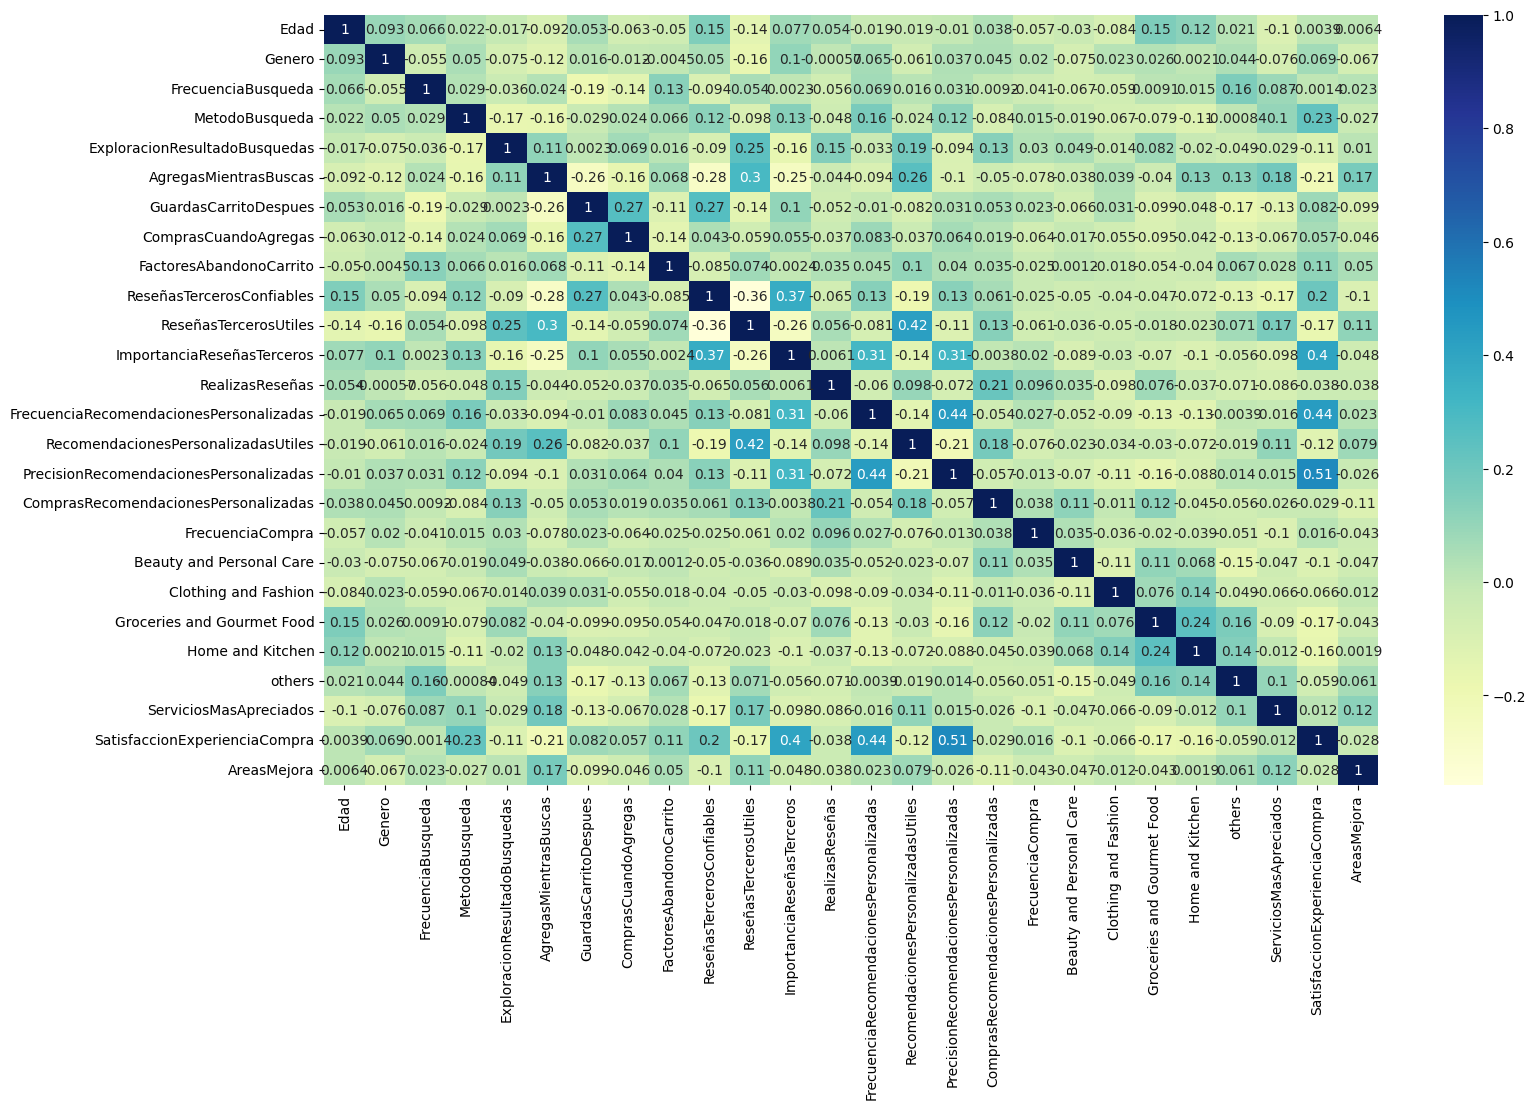

In [ ]:
# matrix de correlacion
fig=plt.figure(figsize=(17,10))
sns.heatmap(df2.corr(), annot=True, cmap='YlGnBu')